<a href="https://colab.research.google.com/github/prawinbalaji/OCR/blob/main/EacyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
from PIL import Image
import easyocr
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

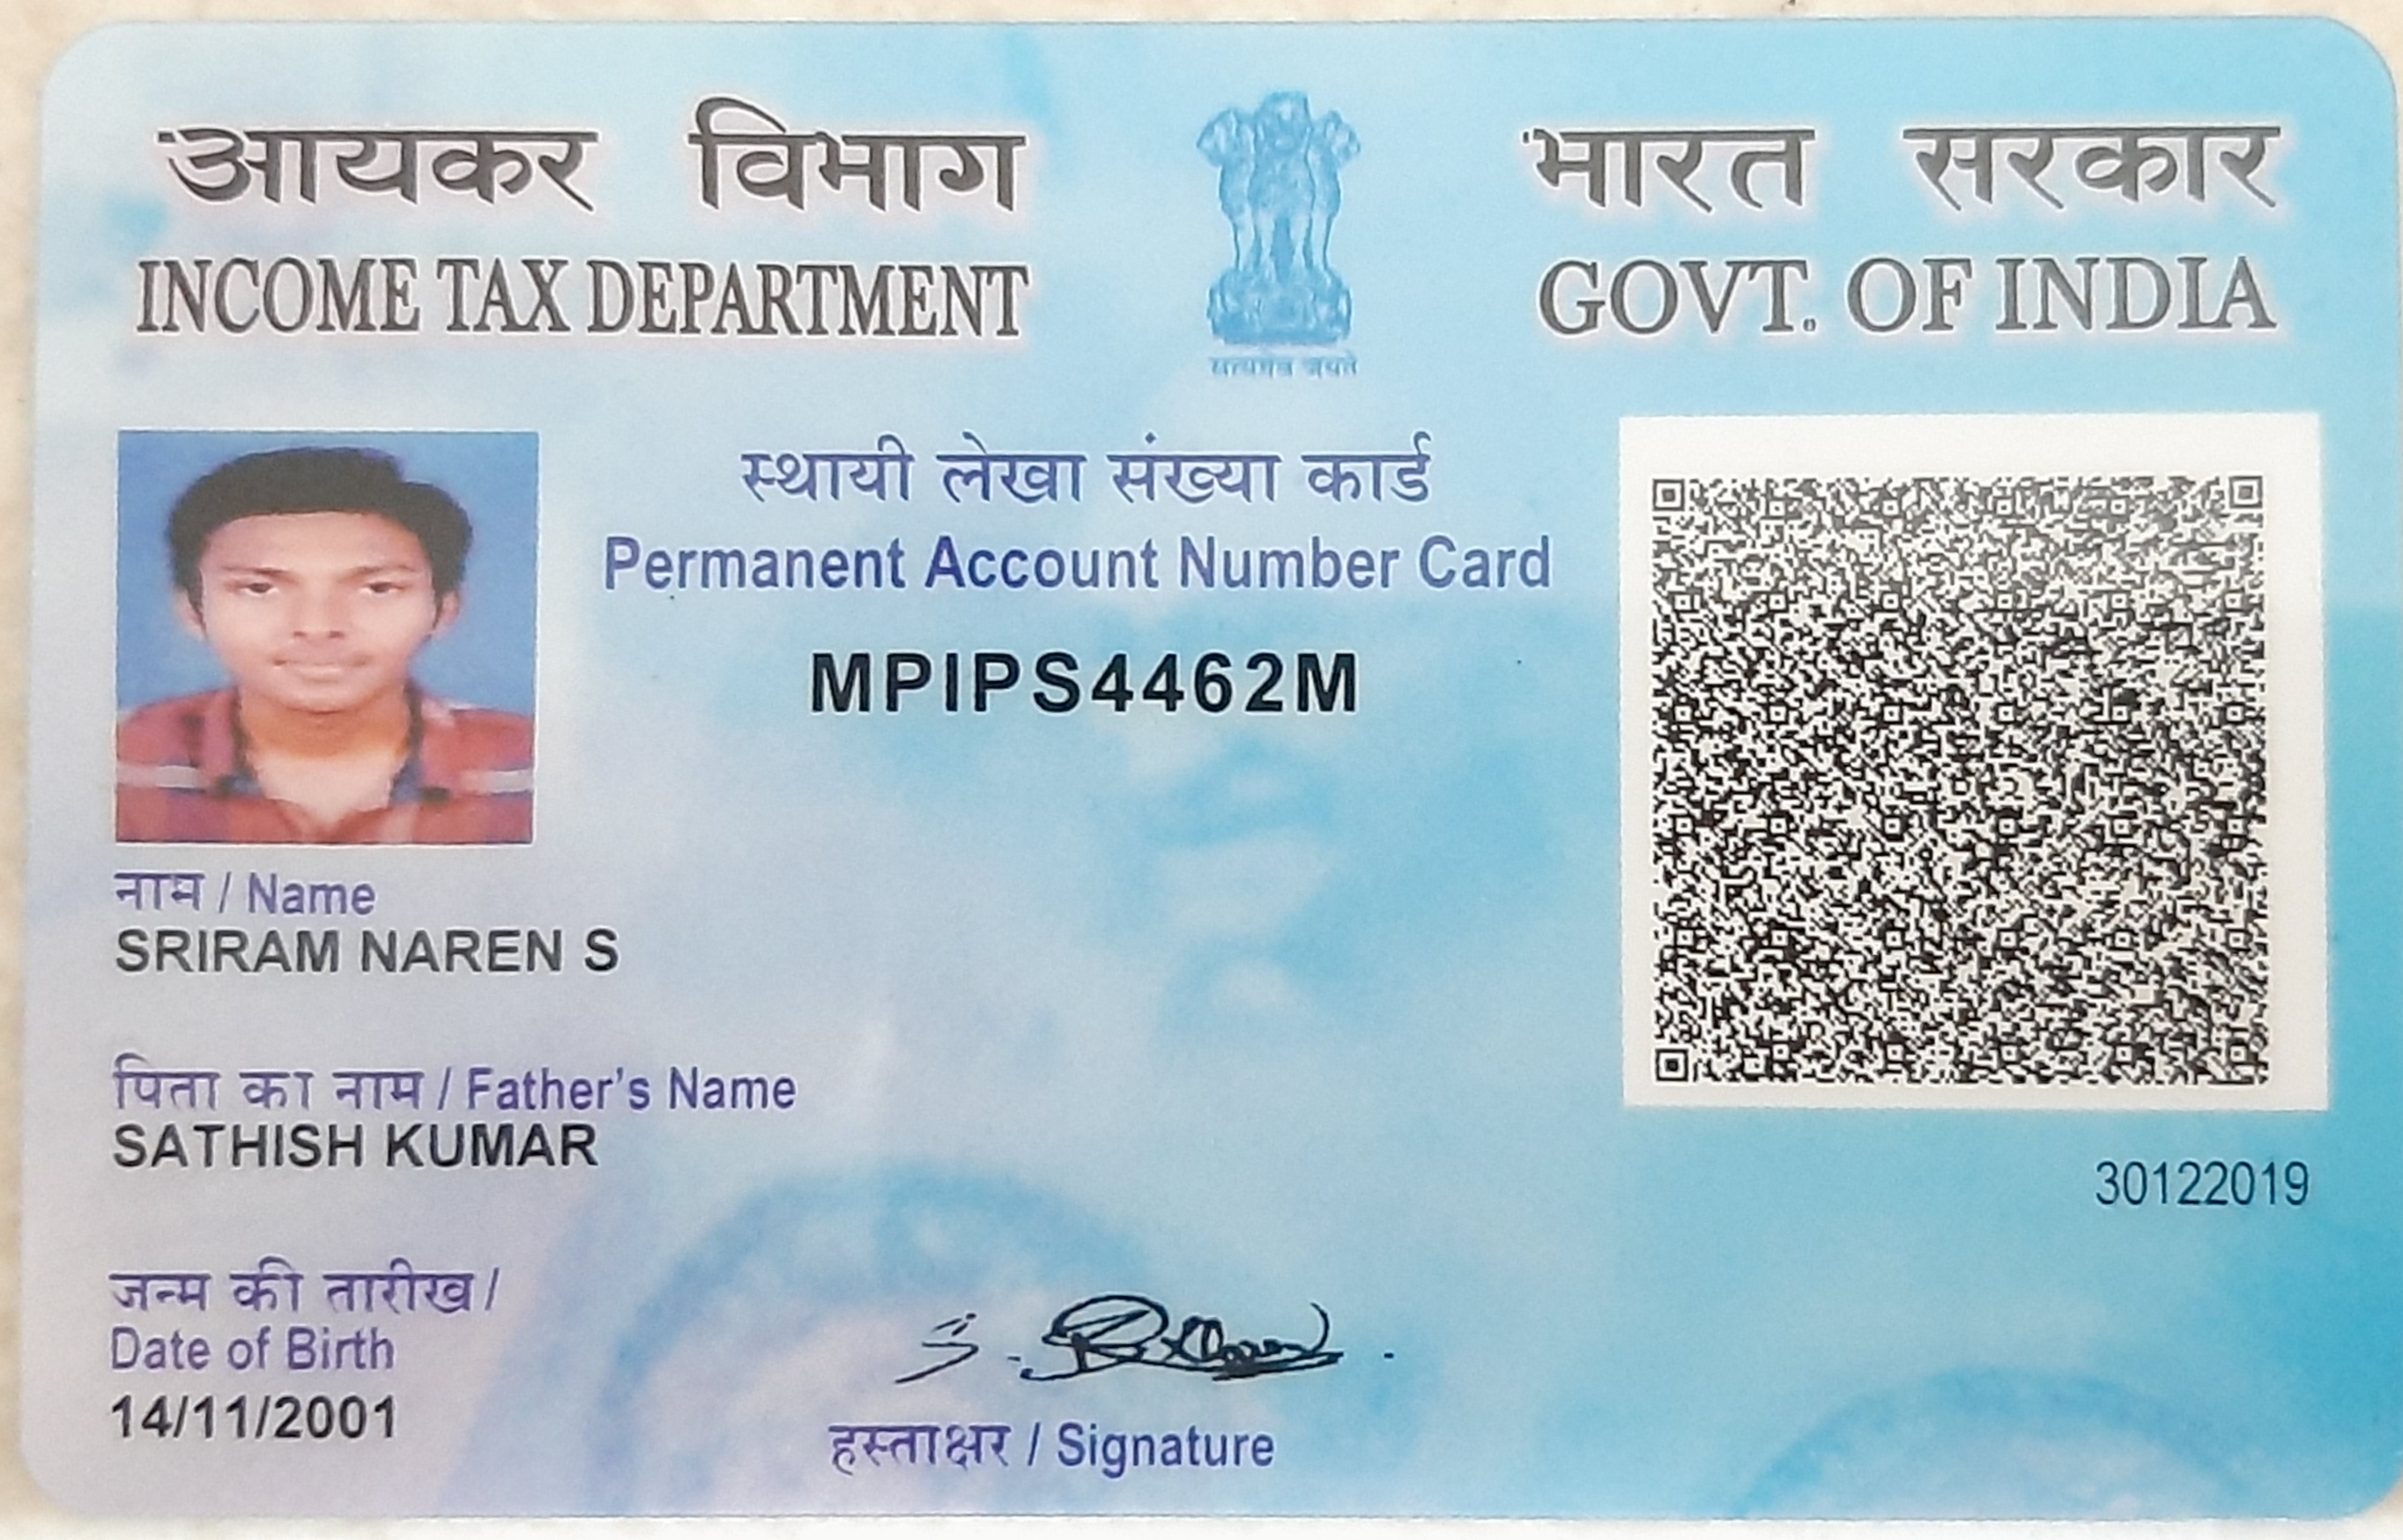

In [ ]:
from IPython.display import Image
Image(filename=r"/content/drive/MyDrive/naren.jpg")

In [ ]:
image=cv2.imread('/content/drive/MyDrive/naren.jpg',0)

In [ ]:
reader = easyocr.Reader(['en', 'hi'], gpu=True)
result = reader.readtext('/content/drive/MyDrive/naren.jpg')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
text1 = reader.readtext('/content/drive/MyDrive/naren.jpg', detail = 1, paragraph = False)

In [ ]:
#@title Default title text
print(text1)

[([[171, 127], [697, 127], [697, 254], [171, 254]], 'आयकर', 0.5847237579624709), ([[754, 100], [1194, 100], [1194, 274], [754, 274]], 'विभाग', 0.9825491995041711), ([[1719, 132], [2072, 132], [2072, 254], [1719, 254]], 'भारत', 0.6402490784502762), ([[2145, 128], [2607, 128], [2607, 253], [2145, 253]], 'सरकार', 0.4612696500653156), ([[136, 273], [1182, 273], [1182, 396], [136, 396]], 'INCOME TAK DEPARTMENT', 0.5832519853011181), ([[1736, 271], [2594, 271], [2594, 393], [1736, 393]], 'GOVT OF INDLA', 0.8558667490677774), ([[827, 484], [1642, 484], [1642, 588], [827, 588]], 'स्थायी लेखा संख्या कार्ड', 0.625608072635207), ([[674, 595], [1771, 595], [1771, 683], [674, 683]], 'Permanent Account Number Card', 0.45611094814708897), ([[913, 728], [1551, 728], [1551, 820], [913, 820]], 'MPIPS४४६2M', 0.2654692006719008), ([[120, 981], [435, 981], [435, 1046], [120, 1046]], 'नान / Name', 0.8139466831169923), ([[124, 1045], [708, 1045], [708, 1112], [124, 1112]], 'SRIRAM NAREN $', 0.883673226711018

In [ ]:
'''for (bbox, text, prob) in text1:
    (tl, tr, br, bl) = bbox
    tl =(int(tl[0]), int(tl[1]))
    tr =(int(tr[0]), int(tr[1]))
    br =(int(br[0]), int(br[1]))
    bl =(int(bl[0]), int(bl[1]))

text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

cv2.rectangle(text1, tl, br, (0,255, 0), 2)
cv2.putText(text1, text, (tl[0], tl[1] - 10),
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2.imshow("Image", text1)
cv2.waitkey(0)'''

'for (bbox, text, prob) in text1:\n    (tl, tr, br, bl) = bbox\n    tl =(int(tl[0]), int(tl[1]))\n    tr =(int(tr[0]), int(tr[1]))\n    br =(int(br[0]), int(br[1]))\n    bl =(int(bl[0]), int(bl[1]))\n\ntext = "".join([c if ord(c) < 128 else "" for c in text]).strip()\n\ncv2.rectangle(text1, tl, br, (0,255, 0), 2)\ncv2.putText(text1, text, (tl[0], tl[1] - 10),\n           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)\ncv2.imshow("Image", text1)\ncv2.waitkey(0)'

In [ ]:
new_word = word_tokenize(text)

        #id_card

        id_card = []
        for syn in wordnet.synsets("id_card"):
            for l in syn.lemmas():
                id_card.append(l.name())

        l=['parent','blood','group','address','thaluk','student','validity','numbers']
        id_card=id_card+l

        #pan_card

        pan_card = []
        for syn in wordnet.synsets("pan_card"):
            for l in syn.lemmas():
                pan_card.append(l.name())

        l1=['income','tax','department','govt','india','permanant','account','number','card']
        pan_card=pan_card+l1

        # Checking the uploaded image and categorizing  it

        id = 0
        pan = 0

        for word in new_word:
            if word in id_card:
                id = True
                #print(word)
                break
            elif word in pan_card:
                pan = True
               #print(word)
                break


        if(id):
            for i in range(0,len(new_word)-1):
                if (new_word[i] == 'group'):
                    if (new_word[i+2] == '+ve' or new_word[i+2] == '-ve'):
                        bg = (new_word[i+1]) + (new_word[i+2])
                        # print(bg)
                    elif (new_word[i+2] == 'tve'):
                        bg = (new_word[i+1]) + '+ve'
                        # print(bg)
                    else:
                        bg = (new_word[i+1])
                        # print(bg)
            match=re.findall(r'\d+[/.-]\d+[/.-]\d+', text)
            DOB=" "
            DOB=DOB.join(match)
            #print(DOB)
            ph = re.findall('[0-9+]{10}', text)
            #print(ph)
        elif(pan):
            match=re.findall(r'\d+[/.-]\d+[/.-]\d+', text)
            DOB=" "
            DOB=DOB.join(match)
            #print(DOB)
            match=re.findall(r'[a-z]+[a-z]+[a-z]+[a-z]+[a-z]+\d+\d+\d+[a-z]', text)
            PANno=" "
            PANno=PANno.join(match)
            #print(PANno)
            flag = 0
            for i in new_word:
                if i == "name":
                    index = new_word.index(i)
                    Name = new_word[index+1] + ' ' +  new_word[index+2]
                    #print(string)
                    flag = 1
                    break
                if flag == 0:
                    for i in new_word:
                        if i == "india":
                            index = new_word.index(i)
                            Name = new_word[index+1] + ' ' + new_word[index+2]
                            #print(string)
                            break

        if(id):
            #print("ID_card")
            filename = '{}.csv'.format('idcard')
            df = pd.read_csv('idcard.csv')
            row_contents = [bg,DOB,ph[0]]
            from csv import writer
            def append_list_as_row(file, list_of_elem):
                with open(file, 'a+', newline='') as write_obj:
                    csv_writer = writer(write_obj)
                    csv_writer.writerow(list_of_elem)
            append_list_as_row(filename, row_contents)
        elif(pan):
            #print("PAN_card")
            filename = '{}.csv'.format('pancard')
            df = pd.read_csv('pancard.csv')
            row_contents = [Name,DOB,PANno]
            from csv import writer
            def append_list_as_row(file, list_of_elem):
                with open(file, 'a+', newline='') as write_obj:
                    csv_writer = writer(write_obj)
                    csv_writer.writerow(list_of_elem)
            append_list_as_row(filename, row_contents)

        return ('ID_card' if id > 0 else 'PAN_card')

In [ ]:
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)

True

In [ ]:
new_word = word_tokenize(str(text1))

In [ ]:
print(new_word)

['[', '(', '[', '[', '171', ',', '127', ']', ',', '[', '697', ',', '127', ']', ',', '[', '697', ',', '254', ']', ',', '[', '171', ',', '254', ']', ']', ',', "'आयकर", "'", ',', '0.5847237579624709', ')', ',', '(', '[', '[', '754', ',', '100', ']', ',', '[', '1194', ',', '100', ']', ',', '[', '1194', ',', '274', ']', ',', '[', '754', ',', '274', ']', ']', ',', "'", 'विभाग', "'", ',', '0.9825491995041711', ')', ',', '(', '[', '[', '1719', ',', '132', ']', ',', '[', '2072', ',', '132', ']', ',', '[', '2072', ',', '254', ']', ',', '[', '1719', ',', '254', ']', ']', ',', "'", 'भारत', "'", ',', '0.6402490784502762', ')', ',', '(', '[', '[', '2145', ',', '128', ']', ',', '[', '2607', ',', '128', ']', ',', '[', '2607', ',', '253', ']', ',', '[', '2145', ',', '253', ']', ']', ',', "'सरकार", "'", ',', '0.4612696500653156', ')', ',', '(', '[', '[', '136', ',', '273', ']', ',', '[', '1182', ',', '273', ']', ',', '[', '1182', ',', '396', ']', ',', '[', '136', ',', '396', ']', ']', ',', "'INCOME", 'T

In [ ]:
#id_card
id_card = []
for syn in wordnet.synsets("id_card"):
    for l in syn.lemmas():
        id_card.append(l.name())

l=['parent','blood','group','address','thaluk','student','validity','numbers']
id_card=id_card+l

Creating CSV file

In [ ]:
pan_card = []
for syn in wordnet.synsets("pan_card"):
    for l in syn.lemmas():
        pan_card.append(l.name())

l1=['income','tax','department','govt','india','permanant','account','number','card']
pan_card=pan_card+l1

In [ ]:
#here we will check that the bill belongs to which category
#we will make that category true.
id = 0
pan = 0
for word in new_word:
    if word in id_card:
        id = True
        print(word)
        break
    elif word in pan_card:
        pan = True
        print(word)

In [ ]:
pan

0

In [ ]:
with open('pancard.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Name','DOB','PAN card number'])

In [ ]:
''' for i in new_word:
    if i == "card":
        index = new_word.index(i)
        PANno = new_word[index+1]
        print(PANno) '''

match=re.findall(r'[a-z]+[a-z]+[a-z]+[a-z]+[a-z]+\d+\d+\d+[a-z]', str(text1))

PANno=" "
PANno=PANno.join(match)
print(PANno)

In [ ]:
match=re.findall(r'\d+[/.-]\d+[/.-]\d+', str(text1))

DOB=" "
DOB=DOB.join(match)
print(DOB)

14/11/2001


In [ ]:
flag = 0

for i in new_word:
    if i == "name":
            index = new_word.index(i)
            Name = new_word[index+1]
            new_Name = new_word[index+2]
            list = [Name, new_Name]
            string = " ".join(list)
            print(string)
            flag = 1
            break

if flag == 0:
    for i in new_word:
        if i == "india":
            index = new_word.index(i)
            Name = new_word[index+1]
            new_Name = new_word[index+2]
            list = [Name, new_Name]
            string = " ".join(list)
            print(string)
            break

In [ ]:
filename='{}.csv'.format('pancard')
df=pd.read_csv('pancard.csv')

In [ ]:
row_contents = [Name,DOB,PANno]
from csv import writer

def append_list_as_row(file, list_of_elem):

    with open(file, 'a+', newline='') as write_obj:

        csv_writer = writer(write_obj)

        csv_writer.writerow(list_of_elem)
append_list_as_row(filename, row_contents)